## Demographic data analizer
# The idea of this project is to analize demographic data, which consist of education, race, income and work time per week data of people from different countries. We will compute several values of interest, along the data. The data frame is coming from: Dua, D. and Graff, C. (2019). https://archive.ics.uci.edu/ml/datasets/adult

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## In this challenge I will analyze demographic data using Pandas. Given a dataset of demographic data that was extracted from the 1994 Census database.

In [4]:
 # Read data from file
df = pd.read_csv('adult.data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = df.groupby('race').size() # Pandas groupby is used for grouping the data according to the categories and apply a function to the categories.
race_count


race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27816
dtype: int64

In [6]:
race_count = df['race'].value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [8]:
x = df['race'].value_counts()
x

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

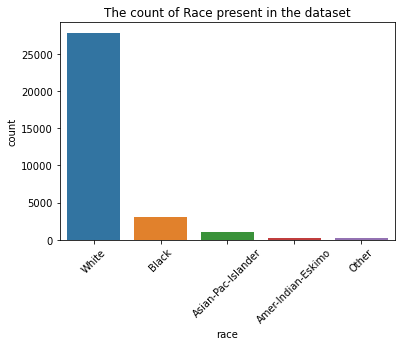

In [9]:
#Seaborn literally counts the number of observations per category for a categorical variable, and displays the results as a bar chart.

sns.countplot(data=df,x='race') 
plt.xticks(rotation=45)
plt.title('The count of Race present in the dataset')
plt.show()

In [9]:
# What is the average age of men? #3 different ways to answer it
average_age_men = df[['age','sex']].set_index('sex').drop(index='Female').mean()
average_age_men 

age    39.433547
dtype: float64

In [10]:
average_age_men = df[df['sex'] == 'Male'].mean()
average_age_men['age'] 

C:\Users\zahed\AppData\Local\Temp\ipykernel_2356\2275342653.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_age_men = df[df['sex'] == 'Male'].mean()


39.43354749885268

In [11]:
x = df.groupby('sex')['age'].mean()
average_age_men=x.Male
average_age_men

39.43354749885268

In [12]:
male = df.loc[df['sex'] == 'Male'] # Filter the data by selecting 'Male' only in the 'gender' column
average_age_men = round(male['age'].mean(),2)
average_age_men

39.43

In [18]:
df_Male = df[df['sex'] == 'Male']
df_Male.age.mean()

39.43354749885268

In [19]:
# What is the percentage of people who have a Bachelor's degree?
percentage_bachelors = df.filter(items=['education']).value_counts()['Bachelors'] / df.filter(items=['education']).value_counts().sum() * 100
percentage_bachelors

16.44605509658794

In [27]:
e = df['education'].value_counts()
perc = round(e.Bachelors / sum(e) * 100,2)
perc

16.45

In [31]:
edu = df.education.value_counts() # Check what goes into 'education'
edu
percentage_bachelors = round(sum(df.education == 'Bachelors')/sum(edu) *100, 2) 
percentage_bachelors

16.45

In [32]:
x=df['education'].value_counts()
x

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [36]:
#percentage_bachelors = round(sum(df['education'] == 'Bachelors')/ sum(x) * 100, 2)
percentage_bachelors = round(x.Bachelors / sum(x) * 100, 2)
percentage_bachelors

16.45

In [51]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# What percentage of people without advanced education make more than 50K?
# with and without `Bachelors`, `Masters`, or `Doctorate`
higher_education = np.count_nonzero((df.education == 'Bachelors') | (df.education == 'Masters') | (df.education == 'Doctorate'))
lower_education = np.count_nonzero((df.education != 'Bachelors') & (df.education != 'Masters') & (df.education != 'Doctorate'))


In [62]:
high_edu_rich = np.count_nonzero(((df.education == 'Bachelors') | (df.education == 'Masters') | (df.education == 'Doctorate')) & (df.salary == '>50K'))
low_edu_rich = np.count_nonzero(((df.education != 'Bachelors') & (df.education != 'Masters') & (df.education != 'Doctorate')) & (df.salary == '>50K'))
# percentage with salary >50K

percentage_high_edu_rich = round(high_edu_rich/higher_education *100, 2)
percentage_high_edu_rich


46.54

In [63]:
percentage_low_edu_rich = round(low_edu_rich/lower_education *100, 2)
percentage_low_edu_rich

17.37

In [66]:
#Alternatively the less-typing options:
# higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
#lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
#higher_education_rich = round(len(higher_education[higher_education['salary'] == '>50k']) / len(higher_education) * 100, 1)
#lower_education_rich = round(len(lower_education[lower_education['salary'] == '>50k']) / len(lower_education) * 100, 1)

In [64]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df['hours-per-week'].min()
min_work_hours
   

1

In [78]:
 # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
min_work_hours_people =df[df['hours-per-week'] == min_work_hours]
num_min_workers = len(min_work_hours_people)
min_work_rich = len(min_work_hours_people[min_work_hours_people['salary'] == '>50K'])
rich_percentage = round(min_work_rich/num_min_workers *100, 2)  
rich_percentage

10.0

In [85]:
# What country has the highest percentage of people that earn >50K?
People_Over50byCountry = df[['native-country','salary']].set_index('salary').drop(labels='<=50K').groupby('native-country').size()
People_Over50byCountry.idxmax()


'United-States'

In [86]:
perc = People_Over50byCountry.max() / People_Over50byCountry.sum() * 100
perc

91.45517153424308

In [87]:
# Identify the most popular occupation for those who earn >50K in India.
IN_50Kup = df.loc[(df.salary == '>50K') & (df['native-country'] == 'India')]
top_IN_occupation = IN_50Kup.groupby('occupation')['occupation'].count().idxmax()
top_IN_occupation

'Prof-specialty'

In [88]:
People_More50 = df[['occupation','native-country','salary']].set_index('salary').drop(labels='<=50K')
People_More50_India = People_More50.set_index('native-country').loc['India'] 
People_More50_India.groupby('occupation').size().idxmax() # idxmax() method returns a Series with the index of the maximum value for each column.

'Prof-specialty'